In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#logist
lr_params ={"penalty":["l1","l2"]}
#knn
params_knn = {"n_neighbors":[1,2,3,4,5]}
#decision_tree
params_arvore = {"max_depth":[None,1,2,3,4]}
#random
params_random = {"n_estimators":[10,20,30],"max_depth":[1,2,3,4]}

In [ ]:
knn= KNeighborsClassifier()
arvore = DecisionTreeClassifier()
random = RandomForestClassifier()

In [ ]:
def seleciona_recursos(modelo,parametros,X,y):
  grid = GridSearchCV(modelo,parametros,error_score=0)
  grid.fit(X,y)
  mean_score = round(grid.cv_results_['mean_fit_time'].mean(), 5)
  score_time = round(grid.cv_results_['mean_fit_time'].mean(), 5)
               
  print(f"Melhor acuracia encontrada: {grid.best_score_}")
  print(f"Melhores parâmetros localizados: {grid.best_params_}")
  print(f"Média de tempo para ajustar o modelo: {mean_score} segundos")
  print(f"Melhor média para o tempo de pontuação: {score_time} segundos")

In [ ]:
import pandas as pd

In [ ]:
dataframe = pd.read_csv("projeto_cap_9.csv")

In [ ]:
!pip install feature-engine

In [ ]:
dataframe.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0


In [ ]:
dataframe.drop(columns=["PassengerId","Name","Ticket","Cabin","WikiId","Name_wiki","Hometown","Destination","Age_wiki","Boarded","Lifeboat","Body"],inplace=True)

In [ ]:
dataframe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_wiki,Boarded,Lifeboat,Body,Class
0,0.0,3,male,22.0,1,0,7.2500,S,22.0,Southampton,NaN,NaN,3.0
1,1.0,1,female,38.0,1,0,71.2833,C,35.0,Cherbourg,4,NaN,1.0
2,1.0,3,female,26.0,0,0,7.9250,S,26.0,Southampton,14?,NaN,3.0
3,1.0,1,female,35.0,1,0,53.1000,S,35.0,Southampton,D,NaN,1.0
4,0.0,3,male,35.0,0,0,8.0500,S,35.0,Southampton,NaN,NaN,3.0


In [ ]:
from feature_engine.discretisation import DecisionTreeDiscretiser

arvore_ft = DecisionTreeDiscretiser(variables=['Age', 'Fare'], param_grid={'max_depth': [1,2,3,4]})

In [ ]:
y= dataframe["Survived"]

In [ ]:
arvore_ft.fit(dataframe,y)

DecisionTreeDiscretiser(param_grid={'max_depth': [1, 2, 3, 4]},
                        variables=['Age', 'Fare'])

In [ ]:
dataframe_arvore = arvore_ft.transform(dataframe)

In [ ]:
dataframe_arvore.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,0.344538,0,0.0,0.259091,Q
1,1,3,female,0.475410,1,0.0,0.259091,S
2,0,2,male,0.475410,0,0.0,0.259091,Q
3,0,3,male,0.344538,0,0.0,0.259091,S
4,1,3,female,0.344538,1,0.0,0.259091,S


In [ ]:
from feature_engine.encoding import CountFrequencyEncoder

In [ ]:
contagem = CountFrequencyEncoder(encoding_method="count",variables=["Sex","Embarked"])

In [ ]:
contagem.fit(dataframe)

CountFrequencyEncoder(variables=['Sex', 'Embarked'])

In [ ]:
dataframe_pronto = contagem.transform(dataframe)

In [ ]:
dataframe_pronto.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,272,34.5,0,0.0,7.8292,46
1,1,3,146,47.0,1,0.0,7.0000,270
2,0,2,272,62.0,0,0.0,9.6875,46
3,0,3,272,27.0,0,0.0,8.6625,270
4,1,3,146,22.0,1,0.0,12.2875,270


In [ ]:
dataframe_pronto.to_csv("projeto_cap_9.csv",index=False)

In [ ]:
dataframe = pd.read_csv("projeto_cap_9.csv")

In [ ]:
dataframe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,272,34.5,0,0.0,7.8292,46
1,1,3,146,47.0,1,0.0,7.0000,270
2,0,2,272,62.0,0,0.0,9.6875,46
3,0,3,272,27.0,0,0.0,8.6625,270
4,1,3,146,22.0,1,0.0,12.2875,270


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(dataframe.drop("Survived",axis=1),dataframe["Survived"],test_size=0.3,random_state=0)

In [ ]:
X_treino.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
96,1,146,76.0,1,0.0,78.8500,270
381,3,272,26.0,0,0.0,7.8792,46
89,2,272,2.0,1,1.0,23.0000,270
233,3,272,27.0,0,0.0,7.8792,46
191,1,272,27.0,0,0.0,26.0000,270


In [ ]:
X_teste.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
360,3,272,14.5,8,2.0,69.5500,270
170,3,272,27.0,0,0.0,7.5500,270
224,1,146,53.0,0,0.0,27.4458,102
358,3,272,27.0,0,0.0,7.7500,46
309,3,146,45.0,1,0.0,14.1083,270


In [ ]:
y_treino.head()

96     1
381    0
89     0
233    0
191    0
Name: Survived, dtype: int64

In [ ]:
y_teste.head()

360    0
170    0
224    1
358    0
309    1
Name: Survived, dtype: int64

In [ ]:
seleciona_recursos(knn,params_knn,X_treino,y_treino)

Melhor acuracia encontrada: 0.9966101694915255
Melhores parâmetros localizados: {'n_neighbors': 2}
Média de tempo para ajustar o modelo: 0.00299 segundos
Melhor média para o tempo de pontuação: 0.00299 segundos


In [ ]:
seleciona_recursos(arvore,params_arvore,X_treino,y_treino)

Melhor acuracia encontrada: 0.9931618936294566
Melhores parâmetros localizados: {'max_depth': 1}
Média de tempo para ajustar o modelo: 0.00312 segundos
Melhor média para o tempo de pontuação: 0.00312 segundos


In [ ]:
seleciona_recursos(random,params_random,X_treino,y_treino)

Melhor acuracia encontrada: 0.9931618936294566
Melhores parâmetros localizados: {'max_depth': 2, 'n_estimators': 20}
Média de tempo para ajustar o modelo: 0.03052 segundos
Melhor média para o tempo de pontuação: 0.03052 segundos


# Seleção de recursos com a correlação de Pearson

In [ ]:
dataframe = pd.read_csv("full.csv")

In [ ]:
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [ ]:
dataframe.shape

(1309, 21)

In [ ]:
dataframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
len(dataframe)

418

In [ ]:
df = pd.read_csv("diabetes.csv")

In [ ]:
df.shape

(768, 9)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

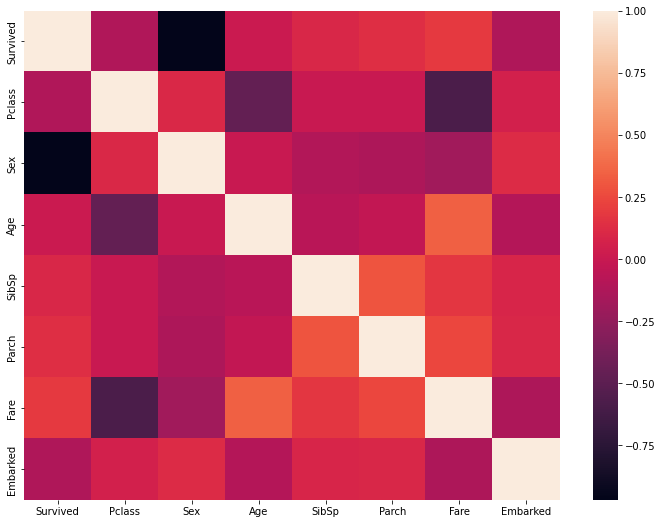

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(dataframe.corr())

In [ ]:
dataframe.corr()["Survived"]

Survived    1.000000
Pclass     -0.108615
Sex        -0.969195
Age         0.008035
SibSp       0.099943
Parch       0.138453
Fare        0.192036
Embarked   -0.117029
Name: Survived, dtype: float64

In [ ]:
dataframe.corr()["Survived"].abs()>0.1

Survived     True
Pclass       True
Sex          True
Age         False
SibSp       False
Parch        True
Fare         True
Embarked     True
Name: Survived, dtype: bool

In [ ]:
lista_melhores = dataframe.columns[dataframe.corr()["Survived"].abs()>0.1]

In [ ]:
lista_melhores

Index(['Survived', 'Pclass', 'Sex', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [ ]:

dataframe_otimo = dataframe[lista_melhores]

In [ ]:
dataframe_otimo.head()

,Survived,Pclass,Sex,Parch,Fare,Embarked
0,0,3,272,0.0,7.8292,46
1,1,3,146,0.0,7.0000,270
2,0,2,272,0.0,9.6875,46
3,0,3,272,0.0,8.6625,270
4,1,3,146,0.0,12.2875,270
